# 第16章 使用列表
列表可能是Scala程序中最常使用的数据结构了。本章将对列表做详细的介绍。我们会讲到很多可以对列表好执行的操作。我们还将对使用列表的一些重要的程序设计原则做出讲解。

## 16.1 List字面量
我们在前面的章节已经介绍过列表，一个包含元素＇a＇、＇b＇和＇c＇的列表写作List（＇a＇, ＇b＇, ＇c＇）。以下是另外一些例子：

In [1]:
val fruit = List("apples", "oranges", "pears")

fruit: List[String] = List("apples", "oranges", "pears")

In [2]:
val nums = List(1, 2, 3, 4)

nums: List[Int] = List(1, 2, 3, 4)

In [3]:
val diags3 = List(
    List(1,0,0),
    List(0,1,0),
    List(0,0,1)
)

diags3: List[List[Int]] = List(List(1, 0, 0), List(0, 1, 0), List(0, 0, 1))

In [4]:
val empty: List[Nothing] = List()

empty: List[Nothing] = List()

Scala的列表类型是协变（covariant）的。意思是对每一组类型S和T，如果S是T的子类型，那么List[S]就是List[T]的子类型。例如，List[String]是List[Object]的子类型。因为每个字符串列表也都可以被当作对象列表，这很自然。[2]
注意，空列表的类型为List[Nothing]。在11.3节我们讲过，在Scala的类继承关系中，Nothing是底类型。由于列表是协变的，对于任何T而言，List[Nothing]都是List[T]的子类型。因此既然空列表对象的类型为List[Nothing]，可以被当作是其他形如List[T]类型的对象。这也是为什么编译器允许我们编写如下的代码：


In [5]:
//List()也是List[String]类型
val xs: List[String] = List()

xs: List[String] = List()

## 16.3 构建列表
所有的列表都构建自两个基础的构建单元：N i l和∷（读作“cons”）。Nil表示空列表。中缀操作符：：表示在列表前追加元素。也就是说，x :: xs表示这样一个列表：第一个元素为x，接下来是列表xs的全部元素。因此，前面的列表值也可以这样来定义：


In [6]:
val fruit = "apples" :: ("oranges" :: ("pears" :: Nil))

fruit: List[String] = List("apples", "oranges", "pears")

In [7]:
val nums  = 1 :: (2 :: (3 :: (4 :: Nil)))

nums: List[Int] = List(1, 2, 3, 4)

In [8]:
val diag3 = (1 :: (0 :: (0 :: Nil))) ::
            (0 :: (1 :: (0 :: Nil))) ::
            (0 :: (0 :: (1 :: Nil))) :: Nil

diag3: List[List[Int]] = List(List(1, 0, 0), List(0, 1, 0), List(0, 0, 1))

In [9]:
val empty = Nil

empty: Nil.type = List()

事实上，之前我们用List（...）对fruit、nums、diag3和empty的定义，不过是最终展开成上面这些定义的包装方法而已。例如，List（1, 2, 3）创建的列表就是 1 :: （2 :: （3 :: Nil））。
由于：：以冒号结尾，:：这个操作符是右结合的：A :: B :: C会被翻译成 A :: （B :: C）。因此，我们可以在前面的定义中去掉圆括号。例如：


In [10]:
val nums = 1 :: 2 :: 3 :: 4 :: Nil

nums: List[Int] = List(1, 2, 3, 4)

跟之前的nums定义是等效的。

## 16.4 列表的基本操作
对列表的所有操作都可以用下面这三项来表述：  
head 返回列表的第一个元素  
tail 返回列表中除第一个元素之外的所有元素  
isEmpty 返回列表是否为空列表  
这些操作在List类中定义为方法。表16.1给出了一些例子。head和tail方法只对非空列表有定义。当我们从一个空列表调用时，它们将抛出异常：

```scala
Nil.head

java.util.NoSuchElementException: head of empty list
  scala.collection.immutable.Nil$.head(List.scala:629)
  ammonite.$sess.cmd10$Helper.<init>(cmd10.sc:1)
  ammonite.$sess.cmd10$.<clinit>(cmd10.sc:7)
```

作为如何处理列表的例子，考虑按升序排列一个数字列表的元素。一个简单的做法是插入排序（insertion sort），这个算法的工作原理如下：对于非空列表x :: xs，先对xs排序，然后将第一个元素x插入到这个排序结果中正确的位置。
<center>表16.1 基本的列表操作</center>

|操作|这个操作做什么|
|-|-|
|empty.isEmpty|返回true|
|fruit.isEmpty|返回false|
|fruit.head|返回"apple"|
|fruit.tail.head|返回"oranges"|
|diag3.head|返回List(1,0,0)|

对一个空列表排序交出空列表。用Scala代码来表示，这个插入排序算法是这样的：

In [11]:
def isort(xs: List[Int]): List[Int] = 
    if(xs.isEmpty) Nil
    else insert(xs.head, isort(xs.tail))

def insert(x: Int, xs: List[Int]): List[Int] = 
    if (xs.isEmpty || x < xs.head) x :: xs
    else xs.head :: insert(x, xs.tail)

defined function isort
defined function insert

In [12]:
val list=List(4,6,1,5,0)

list: List[Int] = List(4, 6, 1, 5, 0)

In [13]:
isort(list)

res12: List[Int] = List(0, 1, 4, 5, 6)

## 16.5 列表模式
列表也可以用模式匹配解开。列表模式可以逐一对应到列表表达式。我们既可以用List（...）这样的模式来匹配列表的所有元素，也可以用：：操作符和Nil常量一点点地将列表解开。
以下是第一种模式的例子：


In [14]:
val List(a,b,c) = fruit

a: String = "apples"
b: String = "oranges"
c: String = "pears"

List（a, b, c）这个模式匹配长度为3的列表，并将三个元素分别绑定到模式变量a、b和c。如果我们事先并不知道列表中元素的个数，更好的做法是用：：来匹配。举例来说，a :: b :: rest匹配的是长度大于等于2的列表：

In [15]:
val a::b::rest = fruit

a: String = "apples"
b: String = "oranges"
rest: List[String] = List("pears")

### 关于List的模式匹配
如果回顾第15章介绍过的可能出现的模式的形式，你会发现不论List（...）还是：：都不满足那些定义。事实上，List（...）是一个由类库定义的**提取器（extractor）**模式的实例。我们将在第26章介绍提取器模式。而x :: xs这样的“cons”模式是中缀操作模式的一个特例。作为表达式，中缀操作等同于一次方法调用。对模式而言，规则是不同的：作为模式，p op q这样的中缀操作等同于op（p, q）。也就是说，中缀操作符op是被当作构造方法模式处理的。具体来说， x :: xs这个表达式相当于∷（x, xs）。
这里透露出一个细节，应该有一个名为：：的类与这个模式构造方法相对应。的确有这么一个类，它的名字叫scala.::，并且就是用来构建非空列表的。因此：：在Scala中出现了两次，一次是作为scala包中的一个类的名字，一次是在List类的方法名。:：方法的作用是产出一个scala.:：类的实例。在第22章将会介绍更多关于List类的实现细节。
使用模式是用基本方法head、tail和isEmpty来解开列表的变通方式。例如，我们再次实现插入排序，不过这一次，我们用模式匹配：


In [16]:
def isort(xs: List[Int]): List[Int] = xs match {
    case List()   => List() //如果是空列表则直接返回
    case x :: xs1 => insert(x, isort(xs1)) //如果不是空列表，调用insert函数，参数为列表head与tail的递归
}

def insert(x: Int, xs: List[Int]): List[Int] = xs match {
    //如果发现xs为空列表，说明已经是最后一个元素了，返回以该元素组成的List即可
    case List()   => List(x) 
    //如果xs不为空列表，比较传入元素与xs.head的大小，如果传入元素比xs.head小，返回原值，否则
    case y :: ys  => if(x <= y) x :: xs else y :: insert(x, ys) 
}

defined function isort
defined function insert

In [17]:
val list=List(4,6,1,5,0)
isort(list)

list: List[Int] = List(4, 6, 1, 5, 0)
res16_1: List[Int] = List(0, 1, 4, 5, 6)

通常，对列表做模式匹配比用方法来解构更清晰，因此模式匹配应该成为你处理列表的工具箱的一部分。

以上是在正确使用Scala列表之前你需要知道的全部内容。不过，Scala还提供了大量方法，捕获了列表操作的通用模式。这些方法让列表处理程序更为精简，通常也更为清晰。接下来的两节，我们将介绍List类中最为重要的方法。


## 16.6 List类的初阶方法
本节将会介绍定义在List类里的大部分初阶方法。如果一个方法不接收任何函数作为入参，就被称为初阶（first-order）方法。我们还将用两个例子来介绍如何组织操作列表的程序的一些技巧。

### 拼接两个列表
跟`::`操作相似的一个操作是拼接，写`:::`。不同`::`,`:::`接收两个列表参数作为操作元。`xs ::: ys`的结果是一个包含了xs所有元素，加上ys所有元素的新列表。

这里有一些例子：


In [18]:
List(1,2) ::: List(3,4,5)

res17: List[Int] = List(1, 2, 3, 4, 5)

In [19]:
List() ::: List(1,2,3)

res18: List[Int] = List(1, 2, 3)

In [20]:
List(1,2,3) ::: List(4)

res19: List[Int] = List(1, 2, 3, 4)

跟cons类似，列表的拼接操作也是右结合的。像这样一个表达式：
`xs ::: ys ::: zs`
会被解读为：
`xs ::: (ys ::: zs)`

### 分治（Divide and Conquer）原则
拼接（:::）是作为List类的一个方法实现的。我们也可以通过对列表进行模式匹配来“手工”实现拼接。我们建议你自己做一下尝试，因为这个过程展示了用列表实现算法的常用方式。首先，我们明确一下拼接方法（我们叫它append）的签名。为了不把事情搞得过于复杂，我们假定append是在List类之外定义的，这样它就需要接收两个待拼接的列表作为参数。这两个列表必须有相同的元素类型，但这个类型具体是什么并不重要。可以给append指定一个代表两个列表的元素类型的类型参数[3]来表达这层意思：
```scala
def append[T](xs: List[T], ys: List[T]): List[T]
```

要设计这样一个append方法，有必要回顾一下对于列表这样的递归数据结构的“分而治之”的程序设计原则。许多对列表的算法都首先会用模式匹配将输入的列表切分成更小的样例。这是设计原则中“分”的部分。然后对每个样例构建对应的结果。如果结果是一个非空的列表，那么这个列表的局部可以通过递归地调用同一个算法来构建出来。这是设计原则中“治”的部分。

把这个设计原则应用到append方法的实现，我们要问的第一个问题是匹配哪一个列表。跟其他方法相比，append方法并不简单，因为我们有两个选择。好在后续的“治”的部分告诉我们需要同时包含两个输入列表的所有元素。由于列表是从后往前构建的，ys可以保持不动，而xs则需要被解开然后追加到ys的前面。这样一来，我们有理由选择xs作为模式匹配的来源。匹配列表最常见的模式是区分空列表和非空列表。于是我们得到如下append方法的轮廓：
```scala
def append[T](xs: List[T], ys: List[T]): List[T] = xs match {
    case List() => ???
    case x :: xs1 => ???
}
```

剩下要做的便是填充由???标出的两处。[4]第一处是当输入列表xs为空时的可选分支。这个case当中拼接操作可以直接交出第二个列表：
```scala
case List() => ys
```
第二处是当输入列表xs由某个头x和尾xs1组成时的可选分支。这个case中结果也是一个非空列表。要构建一个非空列表，我们需要知道这个非空列表的头和尾分别是什么。我们已经知道结果的第一个元素是x。而余下的元素可以通过将第二个列表ys拼接在第一个列表的剩余部分即xs1之后。
这样我们就得到了完整的设计：

In [21]:
def append[T](xs: List[T], ys: List[T]): List[T] = xs match {
    case List() => ys
    case x :: xs1 => x :: append(xs1,ys)
}

defined function append

In [22]:
append(List(1,2),List(3,4))

res21: List[Int] = List(1, 2, 3, 4)

第二个可选分支的计算展示了分治原则中“治”的部分：首先思考我们想要的输出的形状是什么，然后计算这个形状当中的各个独立的组成部分，在这个过程中的必要环节递归地调用同一个算法。最后，从这些组成部分构建出最终的输出结果。
### 获取列表的长度：length
length方法计算列表的长度。

In [23]:
List(1,2,3).length

res22: Int = 3

不同于数组，在列表上的length操作相对更耗资源。找到一个列表的末尾需要遍历整个列表，因此需要消耗与元素数量成正比的时间。这也是为什么将xs.isEmpty这样的测试换成xs.length == 0并不是个好的主意。这两种测试的结果并没有区别，但第二个会更慢，尤其当列表xs很长时。
### 访问列表的末端：init和last
我们已经知道基本的操作head和tail，它们分别获取列表的首个元素和除了首个元素剩余的部分。它们也分别有一个对偶（dual）方法：last返回（非空）列表的最后一个元素，而init返回除了最后一个元素之外剩余的部分：


In [24]:
val abcde = List('a', 'b', 'c', 'd', 'e')

abcde: List[Char] = List('a', 'b', 'c', 'd', 'e')

In [25]:
abcde.init

res24: List[Char] = List('a', 'b', 'c', 'd')

In [26]:
abcde.last

res25: Char = 'e'

跟head和tail一样，这两个方法在应用到空列表的时候也会抛出异常：
```scala
List().last

java.util.NoSuchElementException: last of empty list
  scala.collection.immutable.Nil$.last(List.scala:632)
  scala.collection.immutable.Nil$.last(List.scala:628)
  ammonite.$sess.cmd24$Helper.<init>(cmd24.sc:1)
  ammonite.$sess.cmd24$.<clinit>(cmd24.sc:7)
```

不像head和tail那样在运行的时候消耗常量时间，init和last需要遍历整个列表来计算结果。因此它们的耗时跟列表的长度成正比。
最好将数据组织成大多数访问都发生在列表头部而不是尾部。

### 反转列表：reverse
如果在算法当中某个点需要频繁地访问列表的末尾，有时侯先将列表反转，再对反转后的列表做操作是更好的做法。下面是一个反转的例子：


In [27]:
abcde.reverse

res26: List[Char] = List('e', 'd', 'c', 'b', 'a')

跟所有其他列表操作一样，reverse会创建一个新的列表，而不是对传入的列表做修改。由于列表是不可变的，这样的修改就算想做我们也做不到。现在来验证一下，在reverse操作过后，abcde的原始值并没有变：

In [28]:
abcde

res27: List[Char] = List('a', 'b', 'c', 'd', 'e')

reverse、init和last操作满足一些可以用于对计算过程推理，以及让程序变得简化的法则。
1. reverse是自己的反转：
> `xs.reverse.reverse` 等于 `xs`
2. reverse将init变成tail，将last变成head，只不过元素顺序是颠倒的：
> `xs.reverse.init` 等于 `xs.tail.reverse`  
> `xs.reverse.tail` 等于 `xs.init.reverse`  
> `xs.reverse.head` 等于 `xs.last`  
> `xs.reverse.last` 等于 `xs.head`  



反转操作也可以用拼接（:::）来实现，就像下面这个方法rev：

In [29]:
def rev[T](xs: List[T]): List[T] = xs match {
    case List() => List()
    case x :: xs1 => rev(xs1) ::: List(x)
}

defined function rev

In [30]:
rev(abcde)

res29: List[Char] = List('e', 'd', 'c', 'b', 'a')

不过，这个方法的效率并不高。我们不妨来看一下rev的时间复杂度，假定xs列表长度为n。注意会有n次对rev的递归调用。除了最后一次之外，每次调用都会做列表拼接。xs ::: ys这样的列表拼接所需要的时间跟首个入参xs的长度成正比。因此，rev的整体复杂度为：

`n + (n-1) + (n-2) + ... + 1 == （n+1)*n/2`

换句话说，rev的时间复杂度是入参长度的平方阶。这跟时间复杂度为线性的可变链表的标准反转操作比起来很令人失望。不过，rev当前的实现还能做得更好。在331页的例子中，你将看到如何提高这个方法的执行速度。

### 前缀和后缀：drop、take和splitAt
drop和take是对tail和init的一般化。怎么说呢？它们返回的是列表任意长度的前缀或后缀。表达式“xs take n”返回列表xs的前n个元素。如果n大于xs.length，那么将返回整个xs列表。操作“xs drop n”返回列表xs除了前n个元素之外的所有元素。如果n大于等于xs.length，那么就返回空列表。

splitAt操作将列表从指定的下标位置切开，返回这两个列表组成的对偶。[5]它的定义来自如下这个等式：  
`xs splitAt n 等于 (xs take n,xs drop n)`

In [31]:
abcde take 2

res30: List[Char] = List('a', 'b')

In [32]:
abcde drop 2

res31: List[Char] = List('c', 'd', 'e')

In [33]:
abcde splitAt 2

res32: (List[Char], List[Char]) = (List('a', 'b'), List('c', 'd', 'e'))

### 元素选择：apply和indices

apply方法支持从任意位置选取元素。不过相对于数组而言，对列表的这项操作并不是那么常用。

In [34]:
abcde apply 2

res33: Char = 'c'

跟其他类型一样，当对象出现在方法调用中函数出现的位置时，编译器会帮我们插入apply。因此上面的代码可以简化为：

In [35]:
abcde(2)

res34: Char = 'c'

对列表而言，从任意位置选取元素的操作之所以不那么常用，是因为xs（n）的耗时跟下标n成正比。事实上，apply是通过drop和head定义的：  
`xs apply n 等于 (xs drop n).head`

In [36]:
(abcde drop 2).head

res35: Char = 'c'

从这个定义我们也可以清晰地看到，列表的下标从0开始直到列表长度减1，跟数组一样。Indices方法返回包含了指定列表所有有效下标的列表：

In [37]:
abcde.indices

res36: Range = Range(0, 1, 2, 3, 4)

### 扁平化列表的列表：flatten
flatten方法接收一个列表的列表并将它扁平化，返回单个列表：

In [38]:
List(List(1,2),List(3),List(),List(4,5)).flatten

res37: List[Int] = List(1, 2, 3, 4, 5)

In [39]:
fruit.map(_.toCharArray)

res38: List[Array[Char]] = List(
  Array('a', 'p', 'p', 'l', 'e', 's'),
  Array('o', 'r', 'a', 'n', 'g', 'e', 's'),
  Array('p', 'e', 'a', 'r', 's')
)

In [40]:
fruit.map(_.toCharArray).flatten

res39: List[Char] = List(
  'a',
  'p',
  'p',
  'l',
  'e',
  's',
  'o',
  'r',
  'a',
  'n',
  'g',
  'e',
  's',
  'p',
  'e',
  'a',
  'r',
  's'
)

这个方法只能被应用于那些所有元素都是列表的列表。如果我们尝试将它应用到不满足这个要求的列表，我们会得到一个编译错误：
```scala
List(1,2,3).flatten

cmd42.sc:1: No implicit view available from Int => scala.collection.IterableOnce[B].
val res42 = List(1,2,3).flatten
                        ^Compilation Failed
Compilation Failed
```

### 将列表zip起来：zip和unzip
拉链（zip）操作接收两个列表，返回一个由对偶组成的列表：

In [41]:
abcde.indices zip abcde

res40: collection.immutable.IndexedSeq[(Int, Char)] = Vector(
  (0, 'a'),
  (1, 'b'),
  (2, 'c'),
  (3, 'd'),
  (4, 'e')
)

如果两个列表的长度不同，那么任何没有配对上的元素将被丢弃：

In [42]:
val zipped = abcde zip List(1,2,3)

zipped: List[(Char, Int)] = List(('a', 1), ('b', 2), ('c', 3))

一个有用的特例是将列表和它的下标zip起来。最高效的做法是用zipWithIndex方法，这个方法会将列表中的每个元素和它出现在列表中的位置组合成对偶。

In [44]:
abcde.zipWithIndex

res43: List[(Char, Int)] = List(
  ('a', 0),
  ('b', 1),
  ('c', 2),
  ('d', 3),
  ('e', 4)
)

任何元组的列表也可以通过unzip方法转换回由列表组成的元组：

In [46]:
zipped.unzip

res45: (List[Char], List[Int]) = (List('a', 'b', 'c'), List(1, 2, 3))

zip和unzip方法提供了一种方式让我们同时对多个列表进行操作。在16.9节我们还会讲到另一种更精简的方式。

### 显示列表：toString和mkString
toString操作返回列表的标准字符串表现形式：

In [47]:
abcde.toString

res46: String = "List(a, b, c, d, e)"

如果需要不同的表现形式，可以用mkString方法。xs mkString （pre, sep, post）涉及四个操作元：要显示的列表xs、出现在最前面的前缀字符串pre、在元素间显示的分隔字符串sep，以及出现在最后面的后缀字符串post。

这个操作的结果是如下的字符串：

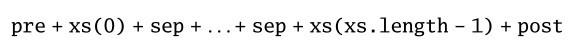

mkString有两个重载的变种，让我们不必填写部分或全部入参。第一个变种只接收一个分隔字符串：  
`xs mkString sep equals xs mkString("",sep,"")`  
第二个变种可以什么入参都不填：  
`xs.mkString equals xs mkString ""`  
下面是一些例子：

In [48]:
abcde mkString ("[",",","]")

res47: String = "[a,b,c,d,e]"

In [49]:
abcde mkString ""

res48: String = "abcde"

In [50]:
abcde.mkString

res49: String = "abcde"

In [51]:
abcde mkString ("List(",", ",")")

res50: String = "List(a, b, c, d, e)"

mkString方法还有别的变种，比如addString，这个方法将构建出来的字符串追加到一个StringBuilder对象，[6]而不是作为结果返回：

In [52]:
val buf = new StringBuilder

buf: StringBuilder = StringBuilder()

In [53]:
abcde addString (buf, "(",";",")")

res52: StringBuilder = StringBuilder(
  '(',
  'a',
  ';',
  'b',
  ';',
  'c',
  ';',
  'd',
  ';',
  'e',
  ')'
)

mkString和addString这两个方法继承自List的超特质Traversable，因此它们也可以用在所有其他集合类型上。

### 转换列表：iterator、toArray、copyToArray
为了在扁平的数组世界和递归的列表世界之间做数据转换，可以使用List类的toArray和Array类的toList方法：

In [54]:
val arr = abcde.toArray

arr: Array[Char] = Array('a', 'b', 'c', 'd', 'e')

In [55]:
arr.toList

res54: List[Char] = List('a', 'b', 'c', 'd', 'e')

还有一个copyToArray方法可以将列表中的元素依次复制到目标数组的指定位置。如下操作：  
`xs copyToArray (arr, start)`

将列表xs的所有元素复制至数组arr，从下标start开始。我们必须确保目标数组足够大，能够容纳整个列表。参考下面的例子：

In [56]:
val arr2 = new Array[Int](10)

arr2: Array[Int] = Array(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [57]:
List(1,2,3) copyToArray(arr2, 3)

In [58]:
arr2

res57: Array[Int] = Array(0, 0, 0, 1, 2, 3, 0, 0, 0, 0)

最后，如果要通过迭代器访问列表元素，可以用iterator方法：

In [59]:
val it = abcde.iterator

it: Iterator[Char] = non-empty iterator

In [60]:
it.next

res59: Char = 'a'

In [61]:
it.next

res60: Char = 'b'

例子：归并排序

之前我们介绍的插入排序写起来很简洁，不过效率并不是很高。它的平均复杂度跟输入列表的长度的平方成正比。更高效的算法是归并排序（merge sort）。

快速通道

这个例子是对分治原则和柯里化的另一次展示，同时也用来探讨算法复杂度的问题。不过，如果你想在初读本书时更快完成，可以安全地跳到16.7节。

归并排序的机制如下：首先，如果列表有零个或一个元素，那么它已然是排好序的，因此列表可以被直接返回。更长一些的列表会被切分成两个子列表，每个子列表各 含约一半原列表的元素。每个子列表被递归地调用同一个函数来排序，然后两个排好序的子列表会通过一次归并操作合在一起。

要实现一个通用的归并排序实现，要允许被排序列表的元素类型和用来比较元素大小的函数是灵活可变的。通过参数将这两项作为参数传入，就得到了最灵活的函数。最终的实现参考示例16.1。

msort 的复杂度为（n log（n）），其中n为输入列表的长度。要搞清楚为什么，注意我们将列表切分成两个子列表，以及将两个排好序的列表归并到一起，这两种操作消耗的时间都 跟列表长度成正比。每次对msort的递归调用都会对输入的元素数量减半，因此差不多需要log（n）次连续的递归调用直到到达长度为1的列表这个基本 case。不过，对更长的列表而言，每次调用都会进一步生成两次调用。所有这些加在一起，在log（n）层的调用当中，原始列表的每个元素都会参与一次切 分操作和一次归并操作。

这样一来，每个调用级别的总成本也是跟n成正比的。由于有log（n）层调用，我们得到的总成本为n log（n）。这个成本跟列表中预算的初始分布无关，因此最差情况的成本跟平均成本相同。归并排序的这个性质让它成为很有吸引力的算法。

In [62]:
def msort[T](less: (T, T) => Boolean)(xs: List[T]): List[T] = {
    def merge(xs: List[T], ys: List[T]): List[T] = (xs, ys) match {
        case (Nil, _) => ys
        case (_, Nil) => xs
        case (x :: xs1, y :: ys1) =>
            if(less(x,y)) x :: merge(xs1, ys)
            else y :: merge(xs, ys1)
    }
    val n = xs.length / 2
    if(n==0) xs
    else {
        val (ys, zs) = xs splitAt n
        merge(msort(less)(ys), msort(less)(zs))
    }
}

defined function msort

In [63]:
msort((x: Int,y: Int) => x < y) (List(5,7,1,3))

res62: List[Int] = List(1, 3, 5, 7)

msort函数是我们在9.3节讨论的柯里化概念的经典案例。柯里化让我们可以很容易将函数定制为一种采用特定比较函数的特例。参考下面的例子：

In [64]:
val intSort = msort((x: Int, y: Int) => x < y) _

intSort: List[Int] => List[Int] = ammonite.$sess.cmd63$Helper$$Lambda$2814/212532836@b9c141b

In [65]:
intSort(List(5,7,1,3))

res64: List[Int] = List(1, 3, 5, 7)

这里的intSort变量指向一个接收整数列表并以数值顺序排列的函数。我们在8.6节曾经介绍过，下画线表示一个缺失的参数列表。在本例中，缺失的参数是应该被排序的列表。再来看另一个例子，我们可以这样来定义对整数列表按数值倒序排列的函数：

In [66]:
val reverseIntSort = msort((x: Int, y: Int) => x > y) _

reverseIntSort: List[Int] => List[Int] = ammonite.$sess.cmd65$Helper$$Lambda$2833/1005975689@35fb2bd

In [67]:
reverseIntSort(List(5,7,1,3))

res66: List[Int] = List(7, 5, 3, 1)

由于我们已经通过柯里化给出了比较函数，接下来只需要在调用intSort或reverseIntSort函数时给出要排序的列表即可。参考下面的例子：

In [68]:
val mixedInts = List(4, 1, 9, 0, 5, 8, 3, 6, 2, 7)

mixedInts: List[Int] = List(4, 1, 9, 0, 5, 8, 3, 6, 2, 7)

In [69]:
intSort(mixedInts)

res68: List[Int] = List(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [70]:
reverseIntSort(mixedInts)

res69: List[Int] = List(9, 8, 7, 6, 5, 4, 3, 2, 1, 0)